# Basic workflow
This chapter explains what version control is and why you should use it, and introduces the most common steps in a common Git workflow.

### Where does Git store information?
Each of your Git projects has two parts: the files and directories that you create and edit directly, and the extra information that Git records about the project's history. The combination of these two things is called a repository.

Git stores all of its extra information in a directory called .git located in the root directory of the repository. Git expects this information to be laid out in a very precise way, so you should never edit or delete anything in .git.

Suppose your home directory /home/repl contains a repository called dental, which has a sub-directory called data. Where is information about the history of the files in /home/repl/dental/data stored?

> /home/repl/dental/.git

### Basic Bash Commands

In [ ]:
# $ ls
# $ cd
# $ cd-
# $ cd--

### How can I check the state of a repository?
When you are using Git, you will frequently want to check the status of your repository. To do this, run the command git status, which displays a list of the files that have been modified since the last time changes were saved.

You have been put in the dental repository. Use git status to discover which file(s) have been changed since the last save. Which file(s) are listed?

In [2]:
# $ git status

### How can I tell what I have changed?
Git has a staging area in which it stores files with changes you want to save that haven't been saved yet. Putting files in the staging area is like putting things in a box, while committing those changes is like putting that box in the mail: you can add more things to the box or take things out as often as you want, but once you put it in the mail, you can't make further changes.

Staging Area

``git status`` shows you which files are in this staging area, and which files have changes that haven't yet been put there. In order to compare the file as it currently is to what you last saved, you can use ``git diff filename``. ``git diff`` without any filenames will show you all the changes in your repository, while ``git diff directory`` will show you the changes to the files in some directory.

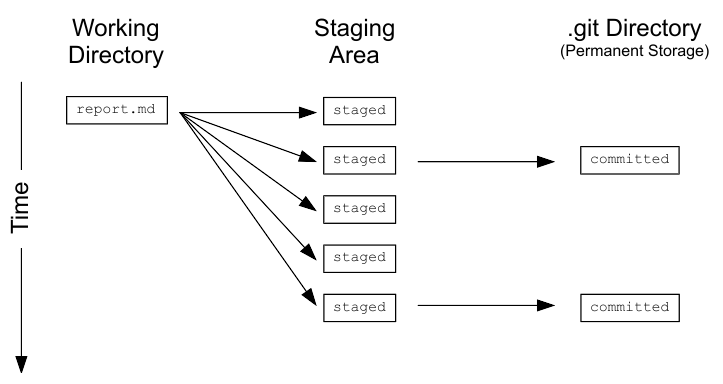

In [4]:
from IPython.display import Image
Image("C:/Users/T0230575/Desktop/Datalab LAS/Documentation/Method/git1.png")

You have been put in the dental repository. Use ``git diff`` to see what changes have been made to the files.

In [6]:
# $ git diff
# $ git diff filename
# $ git diff directory

### What is in a diff?
A diff is a formatted display of the differences between two sets of files. Git displays diffs like this:

``
diff --git a/report.txt b/report.txt
index e713b17..4c0742a 100644
--- a/report.txt
+++ b/report.txt
@@ -1,4 +1,5 @@
-# Seasonal Dental Surgeries 2017-18
+# Seasonal Dental Surgeries (2017) 2017-18
+# TODO: write new summary
``

This shows:

- The command used to produce the output (in this case, diff --git). In it, a and b are placeholders meaning "the first version" and "the second version".
- An index line showing keys into Git's internal database of changes. We will explore these in the next chapter.
- --- a/report.txt and +++ b/report.txt, wherein lines being removed are prefixed with - and lines being added are prefixed with +.
- A line starting with @@ that tells where the changes are being made. The pairs of numbers are start line and number of lines  (in that section of the file where changes occurred). This diff output indicates changes starting at line 1, with 5 lines where there were once 4.
- A line-by-line listing of the changes with - showing deletions and + showing additions (we have also configured Git to show deletions in red and additions in green). Lines that haven't changed are sometimes shown before and after the ones that have in order to give context; when they appear, they don't have either + or - in front of them.
Desktop programming tools like RStudio can turn diffs like this into a more readable side-by-side display of changes; you can also use standalone tools like DiffMerge or WinMerge.

In [ ]:
# $ cd dental
# $ git diff data/northern.csv

# diff --git a/data/northern.csv b/data/northern.csv
# index 5eb7a96..5a2a259 100644
# --- a/data/northern.csv
# +++ b/data/northern.csv
# @@ -22,3 +22,4 @@ Date,Tooth
#  2017-08-13,incisor
#  2017-08-13,wisdom
#  2017-09-07,molar
# +2017-11-01,bicuspid

### What's the first step in saving changes?
You commit changes to a Git repository in two steps:

- Add one or more files to the staging area.
- Commit everything in the staging area.

To add a file to the staging area, use ``git add filename``.

In [ ]:
# $ git add report.txt
# $ git status

### How can I tell what's going to be committed?
To compare the state of your files with those in the staging area, you can use ``git diff -r HEAD``. The ``-r`` flag means "compare to a particular revision", and ``HEAD`` is a shortcut meaning "the most recent commit".

You can restrict the results to a single file or directory using ``git diff -r HEAD path/to/file``, where the path to the file is relative to where you are (for example, the path from the root directory of the repository).

We will explore other uses of ``-r`` and ``HEAD`` in the next chapter.

You have been put in the dental repository, where data/northern.csv has been added to the staging area. Use git diff with -r and an argument to see how files differ from the last saved revision.

In [1]:
# $ git diff -r HEAD
# $ git diff -h HEAD data/northern.csv
# $ git diff -h HEAD data/eastern.csv
# $ git add data/eastern.csv

### Interlude: how can I edit a file? (enter a file within the terminal GUI)
Unix has a bewildering variety of text editors. In this course, we will sometimes use a very simple one called Nano. If you type ``nano filename``, it will open ``filename`` for editing (or create it if it doesn't already exist). You can then move around with the arrow keys, delete characters with the backspace key, and so on. You can also do a few other operations with control-key combinations:

- Ctrl-K: delete a line.
- Ctrl-U: un-delete a line.
- Ctrl-O: save the file ('O' stands for 'output').
- Ctrl-X: exit the editor.

In [3]:
# $ nano file.txt
# CTRL + O
# CTRL + X + ENTER

### How do I commit changes?
To save the changes in the staging area, you use the command ``git commit``. It always saves everything that is in the staging area as one unit: as you will see later, when you want to undo changes to a project, you undo all of a commit or none of it.

When you commit changes, Git requires you to enter a log message. This serves the same purpose as a comment in a program: it tells the next person to examine the repository why you made a change.

- By default, Git launches a text editor to let you write this message. To keep things simple, you can use ``-m "some message in quotes"`` on the command line to enter a single-line message like this:
``git commit -m "Program appears to have become self-aware."``


- If you accidentally mistype a commit message, you can change it using the --amend flag.
``git commit --amend - m "new message"``

In [4]:
# $ cd dental
# $ git add data/report.txt
# $ git status
# $ git commit -m "This is a comment"

### How can I view a repository's history?
The command git log is used to view the log of the project's history. Log entries are shown most recent first, and look like this:
``
commit 0430705487381195993bac9c21512ccfb511056d
Author: Rep Loop <repl@datacamp.com>
Date:   Wed Sep 20 13:42:26 2017 +0000
Added year to report title.
``

The ``commit`` line displays a unique ID for the commit called a hash; we will explore these further in the next chapter. The other lines tell you who made the change, when, and what log message they wrote for the change.

When you run ``git log``, Git automatically uses a pager to show one screen of output at a time. Press the space bar to go down a page or the 'q' key to quit.

You are in the directory ``dental``, which is a Git repository. Use a single Git command to view the repository's history. What is the message on the very first entry in the log (which is displayed last)?

Keep in mind that not all entries may be visible on the first screen, and that you might need to check additional pages to see the very first entry.

In [6]:
# $ git log
# $ q (to exit git log)

### How can I view a specific file's history?
A project's entire log can be overwhelming, so it's often useful to inspect only the changes to particular files or directories. You can do this using ``git log path``, where ``path``
is the path to a specific file or directory. The log for a file shows changes made to that file; the log for a directory shows when files were added or deleted in that directory, rather than when the contents of the directory's files were changed.

You have been put in the dental repository. Use git log to display only the changes made to data/southern.csv. How many have there been?

In [7]:
# $ git log data/southern.csv

### How do I write a better log message
Writing a one-line log message with ``git commit -m "message"`` is good enough for very small changes, but your collaborators (including your future self) will appreciate more information. If you run ``git commit`` without ``-m "message"``, Git launches a text editor with a template like this:

```
 Please enter the commit message for your changes. Lines starting
 with '#' will be ignored, and an empty message aborts the commit.
 On branch master
 Your branch is up-to-date with 'origin/master'.

 Changes to be committed:
 modified:   skynet.R
```

The lines starting with # are comments, and won't be saved. (They are there to remind you what you are supposed to do and what files you have changed.) Your message should go at the top, and may be as long and as detailed as you want.

In [ ]:
# $ cd dental
# $ git add dental/report.txt

### How does Git store information?
You may wonder what information is stored by each commit that you make. Git uses a three-level structure for this.

A commit contains metadata such as the author, the commit message, and the time the commit happened. In the diagram below, the most recent commit is at the bottom (feed0098), underneath its parent commits.
Each commit also has a tree, which tracks the names and locations in the repository when that commit happened. In the oldest (top) commit, there were two files tracked by the repository.
For each of the files listed in the tree, there is a blob. This contains a compressed snapshot of the contents of the file when the commit happened (blob is short for binary large object, which is a SQL database term for "may contain data of any kind"). In the middle commit, report.md and draft.md were changed, so the blobs are shown next to that commit. data/northern.csv didn't change in that commit, so the tree links to the blob from the previous commit. Reusing blobs between commits help make common operations fast and minimizes storage space.

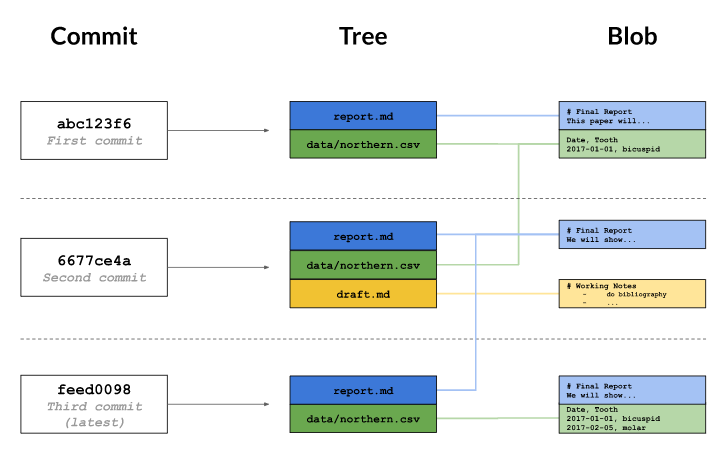

In [8]:
from IPython.display import Image
Image("C:/Users/T0230575/Desktop/Datalab LAS/Documentation/Method/git2.png")

### What is a hash?
Every commit to a repository has a unique identifier called a hash (since it is generated by running the changes through a pseudo-random number generator called a hash function). This hash is normally written as a 40-character hexadecimal string like ``7c35a3ce607a14953f070f0f83b5d74c2296ef93``, but most of the time, you only have to give Git the first 6 or 8 characters in order to identify the commit you mean.

Hashes are what enable Git to share data efficiently between repositories. If two files are the same, their hashes are guaranteed to be the same. Similarly, if two commits contain the same files and have the same ancestors, their hashes will be the same as well. Git can therefore tell what information needs to be saved where by comparing hashes rather than comparing entire files.

Use ``cd`` to go into the dental directory and then run ``git log``. What are the first four characters of the hash of the most recent commit?

In [ ]:
# $ git log

### How can I view a specific commit?
To view the details of a specific commit, you use the command ``git show`` with the first few characters of the commit's hash. For example, the command ``git show 0da2f7`` produces this:

```
commit 0da2f7ad11664ca9ed933c1ccd1f3cd24d481e42
Author: Rep Loop <repl@datacamp.com>
Date:   Wed Sep 5 15:39:18 2018 +0000

    Added year to report title.

diff --git a/report.txt b/report.txt
index e713b17..4c0742a 100644
--- a/report.txt
+++ b/report.txt
@@ -1,4 +1,4 @@
-# Seasonal Dental Surgeries 2017-18
+# Seasonal Dental Surgeries (2017) 2017-18
TODO: write executive summary.  
```

The first part is the same as the log entry shown by git log. The second part shows the changes; as with git diff, lines that the change removed are prefixed with -, while lines that it added are prefixed with +.

You have been put in the dental directory. Use git log to see the hashes of recent commits, and then git show with the first few digits of a hash to look at the most recent commit. How many files did it change?

Reminder: press the space bar to page down through git log's output and q to quit the paged display.

In [9]:
# $ git show 0da2f7

### What is Git's equivalent of a relative path?
A hash is like an absolute path: it identifies a specific commit. Another way to identify a commit is to use the equivalent of a relative path. The special label HEAD, which we saw in the previous chapter, always refers to the most recent commit. The label HEAD~1 then refers to the commit before it, while HEAD~2 refers to the commit before that, and so on.

Note that the symbol between HEAD and the number is a tilde ~, not a minus sign -, and that there cannot be spaces before or after the tilde.

You are in the dental repository. Using a single Git command, show the commit made just before the most recent one. Which of the following files did it change?